 MPG Dataset


1. Do an exploratory data analysis on the mpg dataset from seaborn.
2. First use scikit-learn and next use PyTorch to build binary logistic regression and do all the
neccessary things in machine learning process.
* Target: mpg
* Features: Use appropriate tools and reasoning to choose the important features for the model
3. Build and deploy streamlit web application (or any other framework) with both input features output
prediction are in raw data.

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.impute import SimpleImputer

# Load the dataset
data = sns.load_dataset("mpg")

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [3]:
data.head(4)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst


In [4]:
data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [5]:
# Impute missing values for NUMERIC columns only
# Select only numeric features for imputation
numeric_features = data.select_dtypes(include=['number']).columns
numeric_features

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year'],
      dtype='object')

In [6]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [7]:
# visualize horsepower distribution and box plot

import plotly.graph_objects as go

# Create the distribution plot
fig_dist = go.Figure()
fig_dist.add_trace(go.Histogram(x=data['horsepower'], nbinsx=30, name='Horsepower Distribution'))
fig_dist.update_layout(title_text='Horsepower Distribution', xaxis_title='Horsepower', yaxis_title='Frequency')

# Create the box plot
fig_box = go.Figure()
fig_box.add_trace(go.Box(y=data['horsepower'], name='Horsepower Box Plot'))
fig_box.update_layout(title_text='Horsepower Box Plot', yaxis_title='Horsepower')

# Show the plots
fig_dist.show()
fig_box.show()

In [8]:
# Create a SimpleImputer object with strategy as 'mean'
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the 'horsepower' column
data['horsepower'] = imputer.fit_transform(data[['horsepower']])

data.isnull().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0
model_year,0
origin,0
name,0


In [9]:
imputer = SimpleImputer(strategy='median')  # or 'median', 'most_frequent'
data[numeric_features] = imputer.fit_transform(data[numeric_features])

In [10]:
# Iterate through all numerical columns
for col in data.select_dtypes(include=['number']).columns:
    # Create the distribution plot
    fig_dist = go.Figure()
    fig_dist.add_trace(go.Histogram(x=data[col], nbinsx=30, name=f'{col} Distribution'))
    fig_dist.update_layout(title_text=f'{col} Distribution', xaxis_title=col, yaxis_title='Frequency')
    fig_dist.show()

    # Create the box plot
    fig_box = go.Figure()
    fig_box.add_trace(go.Box(y=data[col], name=f'{col} Box Plot'))
    fig_box.update_layout(title_text=f'{col} Box Plot', yaxis_title=col)
    fig_box.show()

In [11]:
# univariate for category variable using plotly

# Iterate through categorical columns
for col in data.select_dtypes(include=['category', 'object']).columns:
    fig = go.Figure(data=[go.Bar(x=data[col].value_counts().index, y=data[col].value_counts().values)])
    fig.update_layout(title_text=f'Bar plot of {col}', xaxis_title=col, yaxis_title='Count')
    fig.show()

In [12]:
# perform bivariate analysis using plotly

# Bivariate analysis using Plotly
for col1 in data.select_dtypes(include=['number']).columns:
    for col2 in data.select_dtypes(include=['number']).columns:
        if col1 != col2:
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=data[col1], y=data[col2], mode='markers'))
            fig.update_layout(title=f'{col1} vs {col2}', xaxis_title=col1, yaxis_title=col2)
            fig.show()

for col1 in data.select_dtypes(include=['number']).columns:
    for col2 in data.select_dtypes(include=['category', 'object']).columns:
        fig = go.Figure()
        for val in data[col2].unique():
            fig.add_trace(go.Box(y=data[data[col2] == val][col1], name=val))
        fig.update_layout(title=f'{col1} vs {col2}', yaxis_title=col1, xaxis_title=col2)
        fig.show()

In [13]:
import plotly.express as px
import seaborn as sns
import pandas as pd

color_map = {
    "usa": "blue",
    "europe": "green",
    "japan": "red"
}

correlation_matrix = data.select_dtypes(include=['number']).corr() # Select only numeric columns for correlation
fig = px.imshow(correlation_matrix, text_auto=True, title="Correlation Matrix")
fig.show()

In [14]:
# Create the scatter matrix
# fig = px.scatter_matrix(data, dimensions=["cylinders", "horsepower", "weight", "acceleration", "mpg"], color="origin", color_discrete_map=color_map)  # Use the new variable
fig = px.scatter_matrix(data, dimensions=["horsepower", "weight", "acceleration", "mpg"], color="origin", color_discrete_map=color_map)  # Use the new variable
fig.show()

In [15]:
# feature selection for modeling

# Feature selection based on correlation with the target variable ('mpg')
target_variable = 'mpg'

# Select only numeric features for correlation calculation
numeric_data = data.select_dtypes(include=['number'])

correlation_with_target = numeric_data.corr()[target_variable].abs().sort_values(ascending=False)
print(correlation_with_target)

# Select features with a correlation above a certain threshold
threshold = 0.5  # Example threshold
selected_features = correlation_with_target[correlation_with_target > threshold].index.tolist()
selected_features.remove(target_variable) # Remove the target variable itself

print("Selected features:", selected_features)


# Alternatively, use feature importance from a model
from sklearn.ensemble import RandomForestRegressor

# Separate features (X) and target (y)
X = data[selected_features]
y = data[target_variable]

# Initialize and train a RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importances from Random Forest:")
feature_importances

mpg             1.000000
weight          0.831741
displacement    0.804203
cylinders       0.775396
horsepower      0.773453
model_year      0.579267
acceleration    0.420289
Name: mpg, dtype: float64
Selected features: ['weight', 'displacement', 'cylinders', 'horsepower', 'model_year']
Feature importances from Random Forest:


,0
displacement,0.336919
weight,0.249235
cylinders,0.168319
model_year,0.126637
horsepower,0.118890


Binary Logistic Regression

In [16]:
# Convert mpg into binary target
data['mpg_binary'] = (data['mpg'] > data['mpg'].median()).astype(int)
data['mpg_binary'].value_counts()

,count
mpg_binary,
0,207
1,191


1 for long mile per galon (saving fuel)

In [17]:
# Select features
features = ['horsepower', 'weight', 'displacement', 'cylinders', 'model_year']
target = 'mpg_binary'

In [18]:
# Split data into training and testing sets
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)




LogisticRegression()

In [20]:
# Predict and evaluate
y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]

print("Scikit-learn Logistic Regression Results:")
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Scikit-learn Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        41
           1       0.95      0.90      0.92        39

    accuracy                           0.93        80
   macro avg       0.93      0.92      0.92        80
weighted avg       0.93      0.93      0.92        80

ROC-AUC Score: 0.9868667917448405


In [21]:
# instead of using scikit learn now use pytorch

# PyTorch Logistic Regression
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report, roc_auc_score

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).reshape(-1, 1)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).reshape(-1, 1)

# Define the logistic regression model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)

    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize the model, loss function, and optimizer
model = LogisticRegressionModel(X_train.shape[1])
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop with loss printing for each epoch
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    #Test loss
    with torch.no_grad():
      test_outputs = model(X_test_tensor)
      test_loss = criterion(test_outputs, y_test_tensor)

    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

#Prediction
with torch.no_grad():
    predicted_probabilities = model(X_test_tensor)
    predicted_labels = (predicted_probabilities >= 0.5).float()

print("\nPyTorch Logistic Regression Results:")
print(classification_report(y_test_tensor, predicted_labels))
print("ROC AUC Score:", roc_auc_score(y_test_tensor, predicted_probabilities))

Epoch [100/1000], Train Loss: 0.3948, Test Loss: 0.3625
Epoch [200/1000], Train Loss: 0.3478, Test Loss: 0.3105
Epoch [300/1000], Train Loss: 0.3237, Test Loss: 0.2836
Epoch [400/1000], Train Loss: 0.3084, Test Loss: 0.2665
Epoch [500/1000], Train Loss: 0.2975, Test Loss: 0.2543
Epoch [600/1000], Train Loss: 0.2891, Test Loss: 0.2450
Epoch [700/1000], Train Loss: 0.2823, Test Loss: 0.2375
Epoch [800/1000], Train Loss: 0.2767, Test Loss: 0.2314
Epoch [900/1000], Train Loss: 0.2719, Test Loss: 0.2262
Epoch [1000/1000], Train Loss: 0.2678, Test Loss: 0.2219

PyTorch Logistic Regression Results:
              precision    recall  f1-score   support

         0.0       1.00      0.85      0.92        41
         1.0       0.87      1.00      0.93        39

    accuracy                           0.93        80
   macro avg       0.93      0.93      0.92        80
weighted avg       0.94      0.93      0.92        80

ROC AUC Score: 0.9868667917448405


In [22]:
# save the pytorch model so when i load i use it with just input features wihout scaling would give accurate result

# Save the model with the scaler
torch.save({
    'model_state_dict': model.state_dict(),
    'scaler_mean': scaler.mean_,
    'scaler_scale': scaler.scale_,
    'features': features #Save the features used for training
}, 'mpg_model_with_scaler.pth')

#Load the model
def load_and_predict(input_features):
  #Load the model and scaler
  checkpoint = torch.load('mpg_model_with_scaler.pth')
  loaded_model = LogisticRegressionModel(len(input_features))
  loaded_model.load_state_dict(checkpoint['model_state_dict'])
  loaded_model.eval()

  #No scaling needed
  input_tensor = torch.tensor(input_features, dtype=torch.float32)

  with torch.no_grad():
      predicted_probabilities = loaded_model(input_tensor)
      predicted_labels = (predicted_probabilities >= 0.5).float()

  return predicted_labels, predicted_probabilities

End

CAR

1. Do an exploratory data analysis on the car dataset from UCI machine learning reposity.
2. First use scikit-learn and next use PyTorch to build multi-class logistic regression and do all
the neccessary things in machine learning process.
* Target: class
* Features: Use appropriate tools and reasoning to choose the important features for the model
3. Build and deploy streamlit web application (or any other framework) with both input features output
prediction are in raw data.

In [23]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
# Import LabelEncoder here:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim

# Load the dataset for car evaluation
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
# Create a new DataFrame called car_data
car_data = pd.read_csv(url, header=None, names=columns)

# Display first few rows
car_data.head(2)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc


In [24]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [25]:
# visualization of univariate using plotly

import plotly.express as px

# Assuming 'car_data' DataFrame from the previous code is available

# Example: Visualizing the distribution of the 'buying' feature
fig = px.histogram(car_data, x="buying", title="Distribution of Buying Price")
fig.show()

# Example: Visualizing the distribution of the 'safety' feature
fig = px.histogram(car_data, x="safety", title="Distribution of Safety Ratings")
fig.show()

# Example: Visualizing the distribution of the 'class' (target variable)
fig = px.histogram(car_data, x="class", title="Distribution of Car Classes")
fig.show()

In [26]:
# bivariate analysis visualization

import plotly.express as px

# Bivariate analysis: Visualizing relationships between features and the target variable

# Example: Buying price vs. Car class
fig = px.histogram(car_data, x="buying", color="class", barmode="group",
                   title="Buying Price vs. Car Class")
fig.show()

# Example: Safety vs. Car class
fig = px.histogram(car_data, x="safety", color="class", barmode="group",
                   title="Safety vs. Car Class")
fig.show()

# Example: Maintenance cost vs. Car class
fig = px.histogram(car_data, x="maint", color="class", barmode="group",
                   title="Maintenance Cost vs. Car Class")
fig.show()

# Example: Number of doors vs. Car class
fig = px.histogram(car_data, x="doors", color="class", barmode="group",
                   title="Number of Doors vs. Car Class")
fig.show()

# Example: Number of persons vs. Car Class
fig = px.histogram(car_data, x="persons", color="class", barmode="group",
                   title="Number of Persons vs. Car Class")
fig.show()


# Example: Luggage boot size vs. Car class
fig = px.histogram(car_data, x="lug_boot", color="class", barmode="group",
                   title="Luggage Boot Size vs. Car Class")
fig.show()

# You can create more visualizations by exploring other feature combinations.
# For example, you could use scatter plots for numerical features if you had any.
# Consider using other plot types like box plots or violin plots to show the distribution
# of a feature for each class in the target variable.

In [27]:
# Check class distribution
car_data['class'].value_counts()

,count
class,
unacc,1210
acc,384
good,69
vgood,65


In [28]:
# Check for missing values
print(car_data.isnull().sum())



buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64


class   acc  good  unacc  vgood
buying                         
high    108     0    324      0
low      89    46    258     39
med     115    23    268     26
vhigh    72     0    360      0


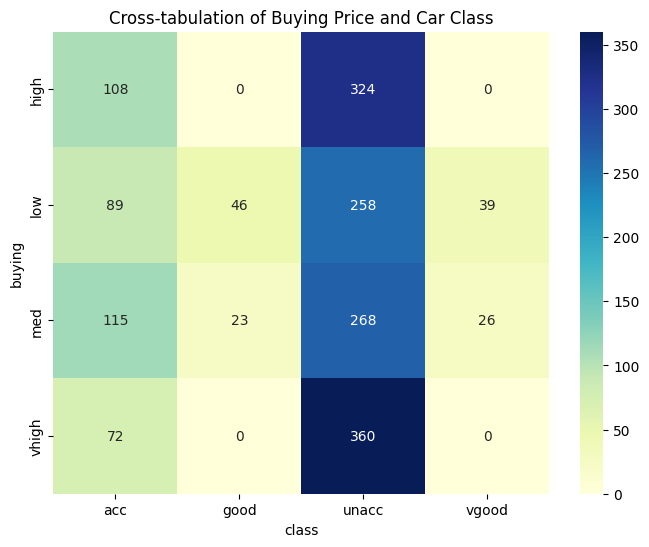

In [29]:
# Since there are no missing values, no handling is needed in this case.
# If there were missing values, you could handle them using methods like:
# - Imputation (filling with mean, median, mode, or other strategies)
# - Removal of rows or columns with missing data

# Further analysis (example using a cross-tabulation)
# This example creates a cross-tabulation of 'buying' and 'class'
cross_tab = pd.crosstab(car_data['buying'], car_data['class'])
print(cross_tab)

# You could visualize the cross-tabulation using a heatmap:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Cross-tabulation of Buying Price and Car Class")
plt.show()

# You can perform similar cross-tabulations and visualizations for other feature-target pairs
# to further explore the relationships in your data.

In [30]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
import numpy as np

# Assuming 'car_data' is a pandas DataFrame with the target column 'class'

# Step 1: Feature Selection using Chi-Squared Test
# Separate features and target variable
X = car_data.drop('class', axis=1)
y = car_data['class']

# Encode categorical features using LabelEncoder
label_encoders = {}
for column in X.columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Encode target variable
target_encoder = LabelEncoder()
y_encoded = target_encoder.fit_transform(y)

# Perform chi-squared test
chi2_scores, p_values = chi2(X, y_encoded)

# Display feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi2 Score': chi2_scores,
    'P-value': p_values
})
print("Chi-squared Test Results:")
print(feature_scores)

# Optional: Select top features based on p-value or chi-squared score
selected_features = feature_scores[feature_scores['P-value'] < 0.05]['Feature'].tolist()
print("\nSelected Features based on P-value < 0.05:")
print(selected_features)

# Step 2: Preprocessing
# Keep only selected features (if selection is applied)
X = X[selected_features]

# Perform OneHotEncoding for the selected features
ohe = OneHotEncoder()
X_encoded = ohe.fit_transform(X).toarray()

# Step 3: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Step 4: Model Building
# Create Logistic Regression model with multi-class support
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

# Step 5: Evaluation
# Predict on the test set
y_pred = model.predict(X_test)

# Metrics: Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print("\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix)

# Optional: Decode predictions back to original labels
y_pred_labels = target_encoder.inverse_transform(y_pred)
y_test_labels = target_encoder.inverse_transform(y_test)

# Example: Compare predictions with ground truth
comparison = pd.DataFrame({'Actual': y_test_labels, 'Predicted': y_pred_labels})
print("\nPrediction Comparison:")
print(comparison.head())


Chi-squared Test Results:
    Feature  Chi2 Score       P-value
0    buying    6.547420  8.781101e-02
1     maint   10.307863  1.612256e-02
2     doors    6.893969  7.535522e-02
3   persons  178.041521  2.335580e-38
4  lug_boot   34.263782  1.742744e-07
5    safety   72.963169  9.898638e-16

Selected Features based on P-value < 0.05:
['maint', 'persons', 'lug_boot', 'safety']

Evaluation Metrics:
Accuracy: 0.82
Precision: 0.80
Recall: 0.82
F1-Score: 0.80

Confusion Matrix:
[[ 88   0  23   4]
 [ 21   0   0   0]
 [ 30   0 333   0]
 [ 16   0   0   4]]

Prediction Comparison:
  Actual Predicted
0    acc       acc
1  unacc     unacc
2  vgood     vgood
3    acc     unacc
4  unacc     unacc


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Epoch [100/1000], Train Loss: 1.0924, Test Loss: 1.1458
Epoch [200/1000], Train Loss: 0.9425, Test Loss: 1.0102
Epoch [300/1000], Train Loss: 0.8816, Test Loss: 0.9511
Epoch [400/1000], Train Loss: 0.8439, Test Loss: 0.9117
Epoch [500/1000], Train Loss: 0.8163, Test Loss: 0.8813
Epoch [600/1000], Train Loss: 0.7947, Test Loss: 0.8569
Epoch [700/1000], Train Loss: 0.7775, Test Loss: 0.8371
Epoch [800/1000], Train Loss: 0.7637, Test Loss: 0.8210
Epoch [900/1000], Train Loss: 0.7524, Test Loss: 0.8080
Epoch [1000/1000], Train Loss: 0.7431, Test Loss: 0.7974
Accuracy: 0.6763005780346821


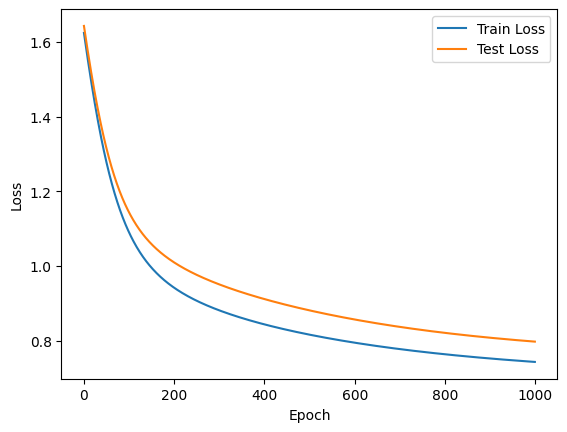

In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
car_data = pd.read_csv(url, header=None, names=columns)

# Prepare the data
X = car_data.drop('class', axis=1)
y = car_data['class']

# Label encode all features and target
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Define the model
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.linear(x)

# Initialize model, loss, and optimizer
input_dim = X_train_tensor.shape[1]
output_dim = len(np.unique(y))
model = LogisticRegressionModel(input_dim, output_dim)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000
train_losses = []
test_losses = []

for epoch in range(num_epochs):
    # Training
    optimizer.zero_grad()
    outputs = model(X_train_tensor)
    train_loss = criterion(outputs, y_train_tensor)
    train_loss.backward()
    optimizer.step()
    train_losses.append(train_loss.item())

    # Testing
    with torch.no_grad():
        test_outputs = model(X_test_tensor)
        test_loss = criterion(test_outputs, y_test_tensor)
        test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

# Prediction and evaluation
with torch.no_grad():
    predicted = torch.argmax(model(X_test_tensor), dim=1)

    # Convert predicted to a NumPy array before using it in accuracy_score
    predicted = predicted.cpu().numpy()

    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy: {accuracy}')

# Plot losses
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.36      0.10      0.15        83
           1       0.00      0.00      0.00        11
           2       0.70      0.96      0.81       235
           3       0.00      0.00      0.00        17

    accuracy                           0.68       346
   macro avg       0.27      0.26      0.24       346
weighted avg       0.56      0.68      0.59       346



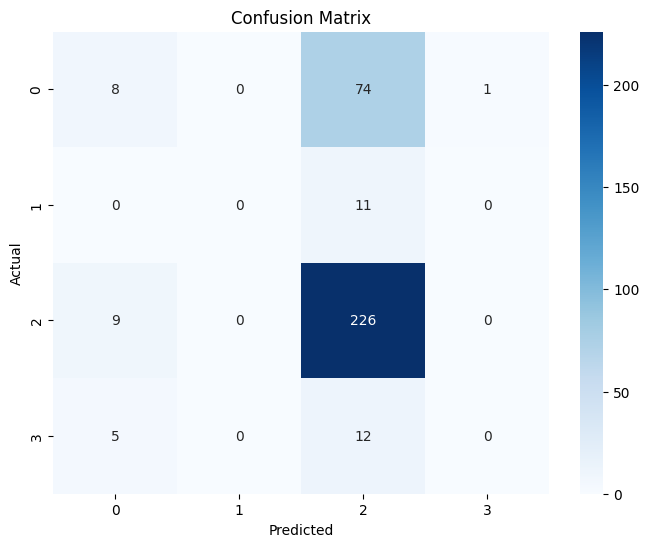

Accuracy: 0.6763005780346821


In [33]:
# Prediction and evaluation (within the PyTorch section)
with torch.no_grad():
    predicted = torch.argmax(model(X_test_tensor), dim=1)

    # Convert predicted tensor to NumPy array
    predicted = predicted.cpu().numpy()  # Add this line

    # Generate the classification report
    print(classification_report(y_test, predicted))

    # Generate and plot the confusion matrix
    conf_matrix = confusion_matrix(y_test, predicted)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

    accuracy = accuracy_score(y_test, predicted)
    print(f'Accuracy: {accuracy}')

In [34]:
import joblib

# Save the trained model
torch.save(model.state_dict(), 'pytorch_car_model.pth')

# Save the preprocessing objects
preprocessing_objects = {
    'label_encoders': label_encoders,
    'target_encoder': target_encoder
}
joblib.dump(preprocessing_objects, 'preprocessing_objects.joblib')

print("Model and preprocessing objects saved successfully.")


Model and preprocessing objects saved successfully.


End
